**Byreddy Nishitha Reddy , 700782272**

1. Use the use case in the class:
a. Add more Dense layers to the existing code and check how the accuracy changes.


In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Load dataset [cite: 7]
# Ensure diabetes.csv is in the same directory
dataset = pd.read_csv("diabetes.csv", header=None).values

# Split data into training and testing (25% test size) [cite: 7]
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)

# Create model [cite: 1]
my_first_nn = Sequential()

# 1. Initial Hidden Layer [cite: 1]
my_first_nn.add(Dense(20, input_dim=8, activation='relu'))

# 2. ADDITIONAL Dense Layer 1
my_first_nn.add(Dense(16, activation='relu'))

# 3. ADDITIONAL Dense Layer 2
my_first_nn.add(Dense(8, activation='relu'))

# Output layer (Sigmoid is used for binary classification) [cite: 1]
my_first_nn.add(Dense(1, activation='sigmoid'))

# Compile and Fit [cite: 1]
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100, verbose=0)

# Evaluate the changes
print("--- Model Summary with Added Layers ---")
print(my_first_nn.summary())
print("\nEvaluation (Loss, Accuracy):")
print(my_first_nn.evaluate(X_test, Y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Model Summary with Added Layers ---


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.76 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,324 (5.18 KB)

None

Evaluation (Loss, Accuracy):
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7259 - loss: 0.5773  
[0.5990376472473145, 0.6979166865348816]


1b. Change the data source to Breast Cancer dataset * available in the source code folder and make required
changes. Report accuracy of the model.

In [3]:
#1b
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# 1. Load the Breast Cancer dataset
dataset = pd.read_csv("breastcancer.csv")

# 2. Data Preprocessing
# Drop 'id' and the empty 'Unnamed: 32' column
dataset = dataset.drop(columns=['id', 'Unnamed: 32'])

# Encode the diagnosis labels (Malignant 'M' -> 1, Benign 'B' -> 0)
label_encoder = LabelEncoder()
dataset['diagnosis'] = label_encoder.fit_transform(dataset['diagnosis'])

# Separate features and target
X = dataset.drop(columns=['diagnosis']).values
Y = dataset['diagnosis'].values

# Split data into training and testing sets (25% test size)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

# 3. Normalization (Requirement for Q3)
# Standardization scales features to have mean=0 and variance=1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4. Create the Model
model = Sequential()
# The breast cancer dataset has 30 features, so input_dim must be 30
model.add(Dense(20, input_dim=30, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile and Fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, Y_train, epochs=100, verbose=0)

# 5. Evaluate and Report Accuracy
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Model Accuracy on Breast Cancer Dataset: {accuracy * 100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Accuracy on Breast Cancer Dataset: 96.50%


1c. Implementation Code for Normalization Comparison

In [4]:
#1c
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# 1. Load and Preprocess Data
df = pd.read_csv("breastcancer.csv")
df = df.drop(columns=['id', 'Unnamed: 32']) # Clean data

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M/B to 1/0

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=87)

# --- Scenario A: Without Normalization ---
model_raw = Sequential()
model_raw.add(Dense(20, input_dim=30, activation='relu'))
model_raw.add(Dense(16, activation='relu'))
model_raw.add(Dense(1, activation='sigmoid'))
model_raw.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_raw.fit(X_train, y_train, epochs=100, verbose=0)
_, acc_raw = model_raw.evaluate(X_test, y_test, verbose=0)

# --- Scenario B: With Normalization (Using StandardScaler) ---
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model_scaled = Sequential()
model_scaled.add(Dense(20, input_dim=30, activation='relu'))
model_scaled.add(Dense(16, activation='relu'))
model_scaled.add(Dense(1, activation='sigmoid'))
model_scaled.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_scaled.fit(X_train_scaled, y_train, epochs=100, verbose=0)
_, acc_scaled = model_scaled.evaluate(X_test_scaled, y_test, verbose=0)

# 2. Report Results
print(f"Accuracy without Normalization: {acc_raw * 100:.2f}%")
print(f"Accuracy with Normalization: {acc_scaled * 100:.2f}%")
print(f"Improvement: {(acc_scaled - acc_raw) * 100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy without Normalization: 89.51%
Accuracy with Normalization: 96.50%
Improvement: 6.99%


2 a. Plotting Loss and Accuracy



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8369 - loss: 0.5277 - val_accuracy: 0.9429 - val_loss: 0.1829
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9682 - loss: 0.1059 - val_accuracy: 0.9684 - val_loss: 0.1041
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0638 - val_accuracy: 0.9717 - val_loss: 0.0892
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9867 - loss: 0.0441 - val_accuracy: 0.9749 - val_loss: 0.0857
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.9813 - val_loss: 0.0660
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9933 - loss: 0.0220 - val_accuracy: 0.9808 - val_loss: 0.0673
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9823 - val_loss: 0.0668
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 

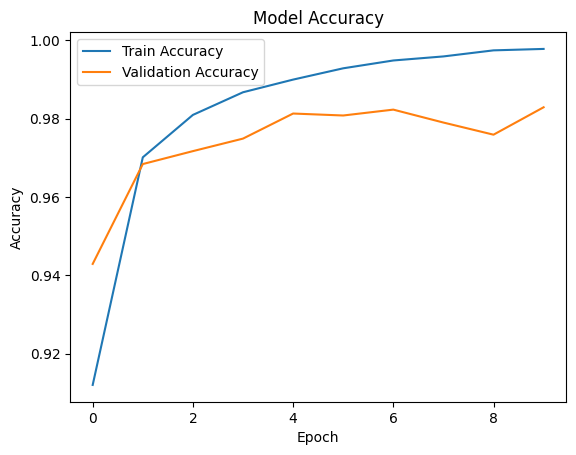

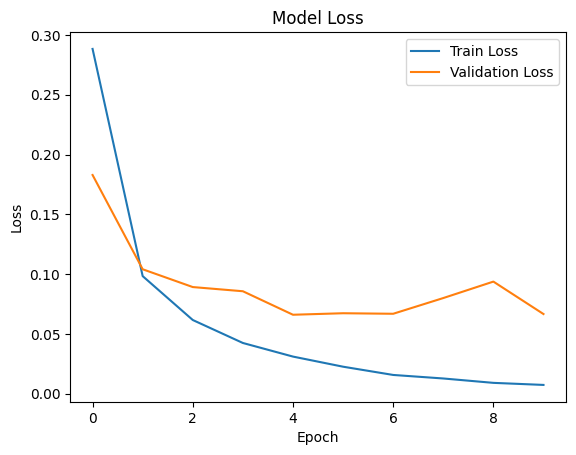

In [5]:
#2a
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

# Load and preprocess
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Build Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Capture history
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10,
                    verbose=1, validation_data=(test_data, test_labels_one_hot))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

2b. Single Image Inference

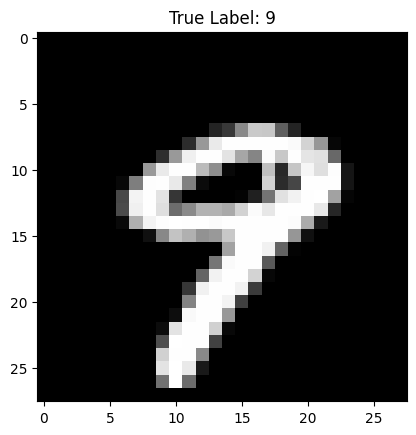

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
The model predicts this image is a: 9


In [6]:
# 2b Select the 10th image from the test set
sample_image = test_images[9]
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {test_labels[9]}")
plt.show()

# Reshape and Predict
sample_data = sample_image.reshape(1, 784).astype('float32') / 255
prediction = model.predict(sample_data)
predicted_class = np.argmax(prediction)

print(f"The model predicts this image is a: {predicted_class}")

2c. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens

In [8]:
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

# 1. Load and Preprocess Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 2. Creating the Modified Network
model = Sequential()

# We use 3 hidden layers now and change activation to 'tanh'
model.add(Dense(512, activation='tanh', input_shape=(dimData,))) # Hidden Layer 1
model.add(Dense(256, activation='tanh'))                        # Hidden Layer 2
model.add(Dense(128, activation='tanh'))                        # Hidden Layer 3 (Added)

# Output layer remains Softmax for multi-class classification
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Training
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10,
                    verbose=1, validation_data=(test_data, test_labels_one_hot))

# 4. Evaluation

loss, accuracy = model.evaluate(test_data, test_labels_one_hot, verbose=0)
print(f"Test Accuracy with Tanh and 3 Hidden Layers: {accuracy*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8289 - loss: 0.5531 - val_accuracy: 0.9455 - val_loss: 0.1948
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9531 - loss: 0.1594 - val_accuracy: 0.9629 - val_loss: 0.1224
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9707 - loss: 0.0999 - val_accuracy: 0.9640 - val_loss: 0.1083
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.0708 - val_accuracy: 0.9645 - val_loss: 0.1058
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9758 - val_loss: 0.0710
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9736 - val_loss: 0.0813
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9919 - loss: 0.0275 - val_accuracy: 0.9774 - val_loss: 0.0757
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9946 - loss: 0.0204 - val_accuracy: 0

2d.Run the same code without scaling the images and check the performance?

In [9]:
import numpy as np
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import to_categorical

# 1. Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dimData = np.prod(train_images.shape[1:])

# 2. Reshape to 784 dimensions but KEEPING the range [0, 255]
# Note: We comment out the division by 255.0
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32')

# 3. Process labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 4. Create and compile network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Training
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10,
                    verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7801 - loss: 24.4729 - val_accuracy: 0.9122 - val_loss: 0.8316
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9452 - loss: 0.4615 - val_accuracy: 0.9442 - val_loss: 0.3892
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9586 - loss: 0.2585 - val_accuracy: 0.9497 - val_loss: 0.3338
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9683 - loss: 0.1882 - val_accuracy: 0.9661 - val_loss: 0.2666
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.1550 - val_accuracy: 0.9488 - val_loss: 0.3937
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9761 - loss: 0.1380 - val_accuracy: 0.9544 - val_loss: 0.3410
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9764 - loss: 0.1448 - val_accuracy: 0.9640 - val_loss: 0.2567
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9818 - loss: 0.1136 - val_accuracy: 